# Notes

## Set-up

### Packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

## Distributions

**Definition** A *distribution* is a set of possible outcomes and their corresponding probabilities

**Definition:** A Probability Mass Function (PMF) is a function that maps each possible outcome to its probability.

You can create your own distributions using `scipy.stats.rv_discrete`.

*Example:* Rolling a fair 6-sided die.

In [33]:
outcomes = range(1, 7)
probs = [1/6] * 6
die = stats.rv_discrete(values=[outcomes, probs])

die.pmf(2)

0.16666666666666666

## 101 Bowls

>Next let’s solve a cookie problem with 101 bowls:
>
> - Bowl 0 contains 0% vanilla cookies,
> - Bowl 1 contains 1% vanilla cookies,
> - Bowl 2 contains 2% vanilla cookies,
>
>and so on, up to
>
> - Bowl 99 contains 99% vanilla cookies, and 
> - Bowl 100 contains all vanilla cookies.
>
>As in the previous version, there are only two kinds of cookies, vanilla and chocolate. So Bowl 0 is all chocolate cookies, Bowl 1 is 99% chocolate, and so on.
>
>Suppose we choose a bowl at random, choose a cookie at random, and it turns out to be vanilla. What is the probability that the cookie came from Bowl $x$, for each value of $x$?

In [4]:
def bayesian_update(prior, likelihoods):
    "returns posterior after Bayesian update"
    support = prior.support()
    possible_outcomes = range(support[0], support[1] + 1)
    outcomes = [outcome for outcome in possible_outcomes if prior.pmf(outcome) != 0]
    
    posterior_probs = []
    for outcome in outcomes:
        posterior_probs.append(prior.pmf(outcome) * likelihoods[outcome])

    posterior_probs = [prob / sum(posterior_probs) for prob in posterior_probs]
    posterior = stats.rv_discrete(values=[outcomes, posterior_probs])

    return posterior

In [34]:
bowls = range(101)
prior_probs = [1/101] * 101

prior = stats.rv_discrete(values=[bowls, prior_probs])
likelihoods = np.linspace(0, 1, 101)

posterior = bayesian_update(prior, likelihoods)
for bowl in [0, 5, 50, 100]:
    print(f"Probability that cookie came from bowl {bowl} is {posterior.pmf(bowl):.4f}")

Probability that cookie came from bowl 0 is 0.0000
Probability that cookie came from bowl 5 is 0.0010
Probability that cookie came from bowl 50 is 0.0099
Probability that cookie came from bowl 100 is 0.0198


We can plot the prior and posterior distributions

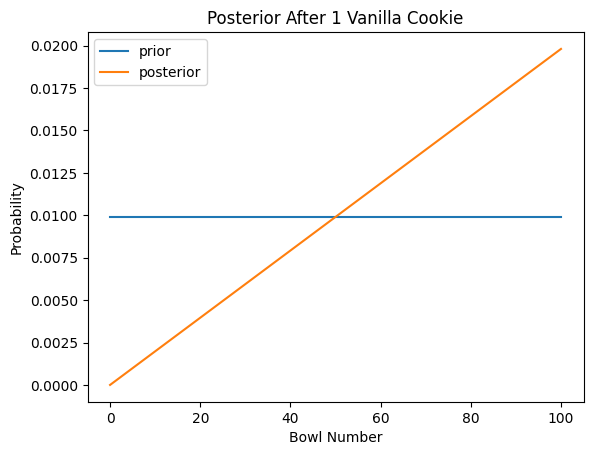

In [6]:
fig, ax = plt.subplots()

ax.plot(bowls, [prior.pmf(bowl) for bowl in bowls], label="prior")
ax.plot(bowls, [posterior.pmf(bowl) for bowl in bowls], label="posterior")

ax.set(
    xlabel="Bowl Number",
    ylabel="Probability",
    title="Posterior After 1 Vanilla Cookie",
)
ax.legend();

What if we take another cookie from the bowl and it's again white?

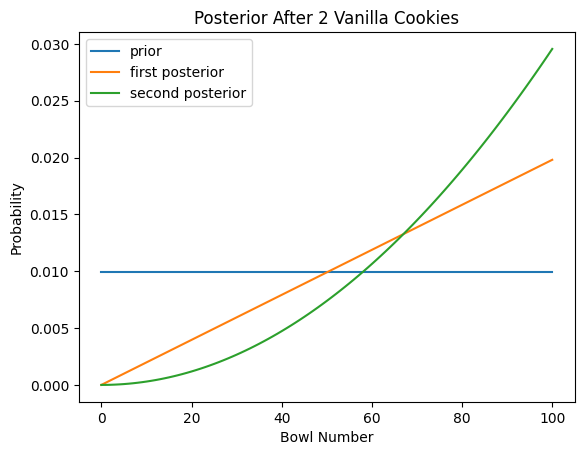

In [7]:
second_posterior = bayesian_update(posterior, likelihoods)

fig, ax = plt.subplots()

ax.plot(bowls, [prior.pmf(bowl) for bowl in bowls], label="prior")
ax.plot(bowls, [posterior.pmf(bowl) for bowl in bowls], label="first posterior")
ax.plot(bowls, [second_posterior.pmf(bowl) for bowl in bowls], label="second posterior")

ax.set(
    xlabel="Bowl Number",
    ylabel="Probability",
    title="Posterior After 2 Vanilla Cookies",
)
ax.legend();

What if we take another cookie and it's chocolate?

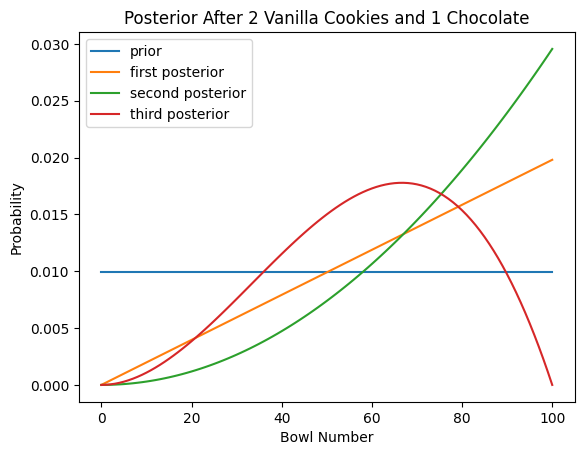

In [8]:
chocolate_likelihoods = 1 - likelihoods
third_posterior = bayesian_update(second_posterior, chocolate_likelihoods)

fig, ax = plt.subplots()

ax.plot(bowls, [prior.pmf(bowl) for bowl in bowls], label="prior")
ax.plot(bowls, [posterior.pmf(bowl) for bowl in bowls], label="first posterior")
ax.plot(bowls, [second_posterior.pmf(bowl) for bowl in bowls], label="second posterior")
ax.plot(bowls, [third_posterior.pmf(bowl) for bowl in bowls], label="third posterior")

ax.set(
    xlabel="Bowl Number",
    ylabel="Probability",
    title="Posterior After 2 Vanilla Cookies and 1 Chocolate",
)
ax.legend();

**Definition:** The *Maximum A Posteriori (MAP)* probability is the outcome with the highest posterior probability.

In [37]:
map_outcome = np.argmax(np.array([third_posterior.pmf(bowl) for bowl in bowls]))
print(f"The MAP after the third cookie is drawn is bowl {map_outcome}.")

The MAP after the third cookie is drawn is bowl 67.


# Exercises

## Exercise 1

Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die. I choose one of the dice at random, roll it four times, and get 1, 3, 5, and 7. What is the probability that I chose the 8-sided die?

### Solution

In [9]:
dice = [6, 8, 12]
prior_probs = [1/3] * 3

prior = stats.rv_discrete(values=[dice, prior_probs])
likelihoods_list = [
    {6: 1/6, 8: 1/8, 12: 1/12},
    {6: 1/6, 8: 1/8, 12: 1/12},
    {6: 1/6, 8: 1/8, 12: 1/12},
    {6: 0, 8: 1/8, 12: 1/12},
]

posterior = prior
for likelihoods in likelihoods_list:
    posterior = bayesian_update(posterior, likelihoods)

print(f"Probability you chose the 8-sided die: {posterior.pmf(8):.2f}.")

Probability you chose the 8-sided die: 0.84


## Exercise 2

In the previous version of the dice problem, the prior probabilities are the same because the box contains one of each die. But suppose the box contains 1 die that is 4-sided, 2 dice that are 6-sided, 3 dice that are 8-sided, 4 dice that are 12-sided, and 5 dice that are 20-sided. I choose a die, roll it, and get a 7. What is the probability that I chose an 8-sided die?

### Solution

In [16]:
dice = [4, 6, 8, 12, 20]

prior_probs = [1, 2, 3, 4, 5]
prior_probs = [prob / sum(prior_probs) for prob in prior_probs]

prior = stats.rv_discrete(values=[dice, prior_probs])
likelihoods= {4: 0, 6: 0, 8: 1/8, 12: 1/12, 20: 1/20}

posterior = bayesian_update(prior, likelihoods)

print(f"Probability you chose the 8-sided die: {posterior.pmf(8):.2f}.")

Probability you chose the 8-sided die: 0.39


## Exercise 3

Suppose I have two sock drawers. One contains equal numbers of black and white socks. The other contains equal numbers of red, green, and blue socks. Suppose I choose a drawer at random, choose two socks at random, and I tell you that I got a matching pair. What is the probability that the socks are white?

For simplicity, let’s assume that there are so many socks in both drawers that removing one sock makes a negligible change to the proportions.

### Solution

Think of the prior as representing the probability that the first sock you chose is various colours. The new data is that the second sock from the same drawer is the same colour.

In [30]:
socks = ["black", "white", "red", "green", "blue"]
sock_mapper = {socks[i]: i for i in range(len(socks))}

prior_probs = [1/4, 1/4, 1/6, 1/6, 1/6]
prior = stats.rv_discrete(values=[range(len(socks)), prior_probs])

sock_likelihoods = [1/2, 1/2, 1/3, 1/3, 1/3]
posterior = bayesian_update(prior, sock_likelihoods)

print(f"The probability that the socks are white is {posterior.pmf(sock_mapper['white']):.2f}.")

The probability that the socks are white is 0.30


## Exercise 4

Here’s a problem from Bayesian Data Analysis:

>Elvis Presley had a twin brother (who died at birth). What is the probability that Elvis was an identical twin?

*Hint:* In 1935, about 2/3 of twins were fraternal and 1/3 were identical.

### Solution

The data for the Bayesian update is that the twin was the same sex.

In [32]:
twins = ["fraternel", "identical"]
twin_mapper = {twins[i]: i for i in range(len(twins))}

prior_probs = [2/3, 1/3]
prior = stats.rv_discrete(values=[range(len(twins)), prior_probs])

likelihoods = [1/2, 1]
posterior = bayesian_update(prior, likelihoods)

print(f"The probability that Elvis was an identical twin is {posterior.pmf(twin_mapper['identical']):.2f}")

The probability that Elvis was an identical twin is 0.50
